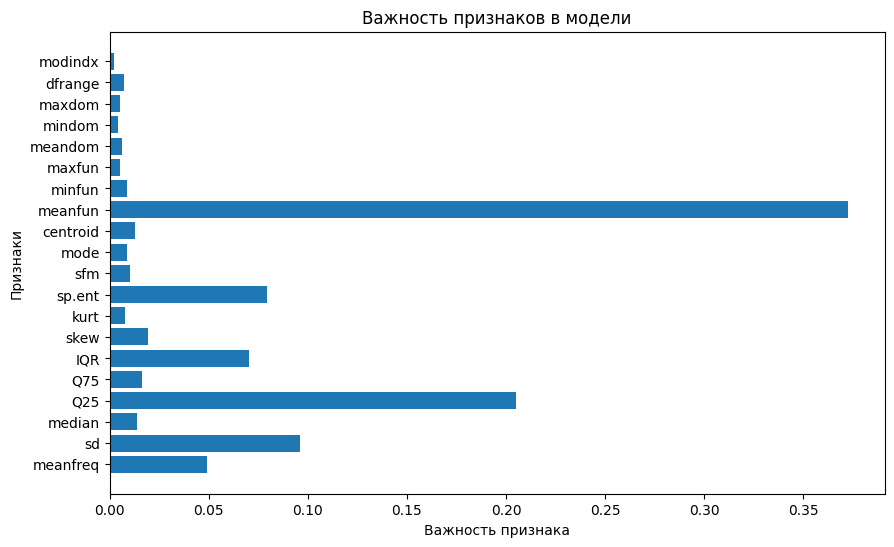

Общая точность (Accuracy): 0.98
Точность (Precision): 0.9908814589665653
Полнота (Recall): 0.9673590504451038
F1-мера: 0.9789789789789789


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Загрузка данных
data = pd.read_csv('voice.csv')

# Преобразование категориальных меток в числовые
data['label'] = le.fit_transform(data['label'])

# Подготовка данных
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)  # Используем RandomForestClassifier
clf.fit(X_train, y_train)

# Визуализация важности признаков
feature_importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели')
plt.show()

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Общая точность (Accuracy): {accuracy:.2f}')
print("Точность (Precision):", precision)
print("Полнота (Recall):", recall)
print("F1-мера:", f1)
